# <center>Pandas基本语法</center>

### 2008年，为满足需要高性能、灵活的数据分析工具，开发商Wes McKinney开始开发Pandas。
* 在Pandas之前，Python主要用于数据迁移和准备。它对数据分析的贡献更小。 Pandas解决了这个问题。
* 使用Pandas可以完成数据处理和分析的五个典型步骤，而不管数据的来源 - 加载，准备，操作，模型和分析。
* Pandas是通过代码来实现Excel和数据库的基本功能，并提供了更丰富的分析函数
* Python Pandas用于广泛的领域，包括金融，经济，统计，分析等学术和商业领域。

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

### Series：带索引的一维数组。 

#### 创建
* 通过list或者ndarray可以创建Series，Pandas会自动创建整型索引。

In [2]:
list1 = [1,2,3,4] ## python的list 
list1

[1, 2, 3, 4]

In [3]:
nparray1 = np.array(list1) #NumPy的ndarra
nparray1

array([1, 2, 3, 4])

In [4]:
series1 = Series(list1) # Pandas的 Series，使用list创建
series1

0    1
1    2
2    3
3    4
dtype: int64

In [5]:
series1.values # series底层是基于ndarray管理数据的，所以 list数据传进来也会转换为 ndarray

array([1, 2, 3, 4], dtype=int64)

In [6]:
series2=Series(nparray1) # Pandas的 Series，使用ndarray创建
series2
# series2.values


0    1
1    2
2    3
3    4
dtype: int32

In [7]:
s=Series([1,3,5,777,6,1.5]) #值的类型会自动统一，ndarray就是这样
s


0      1.0
1      3.0
2      5.0
3    777.0
4      6.0
5      1.5
dtype: float64

In [8]:
s.sort_values() #排序


0      1.0
5      1.5
1      3.0
2      5.0
4      6.0
3    777.0
dtype: float64

In [9]:
s.values

array([  1. ,   3. ,   5. , 777. ,   6. ,   1.5])

In [10]:
s.index

RangeIndex(start=0, stop=6, step=1)

#### 索引自定义

In [11]:
s2 = Series([3,51,5,2,6],index=['a','b','c','d','e'])#自己定义索引
s2

a     3
b    51
c     5
d     2
e     6
dtype: int64

In [12]:
s2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [13]:
s2.index =['one','two','three','four','five'] #可以整体替换索引值
s2

one       3
two      51
three     5
four      2
five      6
dtype: int64

In [14]:
#s2.index[2] = 'x'  #不能单独替换某个自定义索引值

In [15]:
sdata = {'Ohio':35000, 'Texas':7000, 'Orange':10902}
s3 = Series(sdata)
s3

Ohio      35000
Texas      7000
Orange    10902
dtype: int64

#### 值的读取和修改

In [16]:
s2 = Series([3,51,5,2,6],index=['a','b','c','d','e'])
s2['d'] ##使用索引读取值

2

In [17]:
s2[3] #也可以使用位置（Series默认有整数索引，list和ndarray也有）来读取值，类似 字符串、list、ndarray一样的操作

2

In [18]:
s2['d']=100 #类似 list一样修改值，相关的操作都支持
s2

a      3
b     51
c      5
d    100
e      6
dtype: int64

In [19]:
s2[0:3] #使用切片的方式来读取值，按照位置，类似 字符串、list、ndarray一样的操作

a     3
b    51
c     5
dtype: int64

In [20]:
'c' in s2

True

In [21]:
pd.isnull(s3) #判断空值

Ohio      False
Texas     False
Orange    False
dtype: bool

In [22]:
pd.notnull(s3)

Ohio      True
Texas     True
Orange    True
dtype: bool

In [23]:
s3.isnull()

Ohio      False
Texas     False
Orange    False
dtype: bool

### DataFrame 带索引的二维数组

#### 创建
* 通过NumPy的数组ndarray可以创建一个DataFrame。
* 也可以通过字典来创建DataFrame
* DataFrame可以对应Excel里一个表格，数据库里一张表。

In [24]:
dates=pd.date_range('20130101',periods=6)
print(dates)
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,-0.187258,1.477250,0.702187,0.718655
2013-01-02,-1.983568,-0.649221,-0.413167,0.693685
2013-01-03,-0.935931,-0.098597,0.991036,0.718883
2013-01-04,1.351130,0.882000,-0.270051,-0.602641
2013-01-05,-0.242269,-0.809428,-0.203380,-0.052366
2013-01-06,-0.078641,0.619125,-0.631377,-1.537023


In [25]:
df2=pd.DataFrame({'A':1.,
    'B':pd.Timestamp('20130102'),
    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
    'D':np.array([3]*4,dtype='int32'),
    'E':pd.Categorical(['test','train','test','train']),
    'F':'foo'})
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [26]:
df2.dtypes #每一列（column）类型可以不同

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [27]:
data={'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
    'year':[2000, 2001, 2002, 2001, 2002],
    'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}
df3 = pd.DataFrame(data,columns=['year', 'state', 'pop', 'debt'], index=['one', 'two', 'three', 'four', 'five'])
df3

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [28]:
df3['debt']=16 #给一个列（column）赋值
df3

,year,state,pop,debt
one,2000,Ohio,1.5,16
two,2001,Ohio,1.7,16
three,2002,Ohio,3.6,16
four,2001,Nevada,2.4,16
five,2002,Nevada,2.9,16


#### 查看数据

In [29]:
# 查看数据的顶部和底部
print(df.head(8))
print(df.tail(3))


                   A         B         C         D
2013-01-01 -0.187258  1.477250  0.702187  0.718655
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685
2013-01-03 -0.935931 -0.098597  0.991036  0.718883
2013-01-04  1.351130  0.882000 -0.270051 -0.602641
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023
                   A         B         C         D
2013-01-04  1.351130  0.882000 -0.270051 -0.602641
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023


In [30]:
# 查看索引，列名，以及纯的NumPy数据
print(df.index)
print(df.columns)
print(df.values)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[-0.18725797  1.47724954  0.70218729  0.71865521]
 [-1.9835679  -0.64922098 -0.41316685  0.69368521]
 [-0.93593101 -0.09859743  0.99103611  0.71888341]
 [ 1.35113002  0.88199992 -0.27005082 -0.60264127]
 [-0.24226859 -0.80942799 -0.20337959 -0.05236593]
 [-0.07864072  0.61912509 -0.63137738 -1.53702301]]


#### DataFrame.describe() 提供了便捷的数据统计
1. count：返回数组的个数，如上述为4个元素，所以返回为4；
2. mean：返回数组的平均e79fa5e98193e59b9ee7ad9431333433623135值，1 3 5 9的平均值为4.5；
3. std：返回数组的标准差；
4. min：返回数组的最小值；
5. 25%，50%，75%：返回数组的三个不同百分位置的数值，也就是统计学中的四分位数。
6. max：最大值

In [31]:
print(df)
print(df.describe())

                   A         B         C         D
2013-01-01 -0.187258  1.477250  0.702187  0.718655
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685
2013-01-03 -0.935931 -0.098597  0.991036  0.718883
2013-01-04  1.351130  0.882000 -0.270051 -0.602641
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023
              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.346089  0.236855  0.029208 -0.010134
std    1.097027  0.904797  0.656313  0.921108
min   -1.983568 -0.809428 -0.631377 -1.537023
25%   -0.762515 -0.511565 -0.377388 -0.465072
50%   -0.214763  0.260264 -0.236715  0.320660
75%   -0.105795  0.816281  0.475796  0.712413
max    1.351130  1.477250  0.991036  0.718883


In [32]:
#转置矩阵
print(df.T)

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.187258   -1.983568   -0.935931    1.351130   -0.242269   -0.078641
B    1.477250   -0.649221   -0.098597    0.882000   -0.809428    0.619125
C    0.702187   -0.413167    0.991036   -0.270051   -0.203380   -0.631377
D    0.718655    0.693685    0.718883   -0.602641   -0.052366   -1.537023


In [33]:
#沿某一轴排序
print(df.sort_index(axis=0,ascending=False))


                   A         B         C         D
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366
2013-01-04  1.351130  0.882000 -0.270051 -0.602641
2013-01-03 -0.935931 -0.098597  0.991036  0.718883
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685
2013-01-01 -0.187258  1.477250  0.702187  0.718655


In [34]:
#按照值进行排序
print(df.sort_values(by='C'))

                   A         B         C         D
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685
2013-01-04  1.351130  0.882000 -0.270051 -0.602641
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366
2013-01-01 -0.187258  1.477250  0.702187  0.718655
2013-01-03 -0.935931 -0.098597  0.991036  0.718883


#### 数据选择
1. 注意：尽管Python标准库和NumPy的语句在选择和设置数据时更直观和方便交互。但是在生产环境中，我们更建议使用Pandas的数据访问函数： .at, .iat, .loc, .iloc
2. 数据获取，选择一列，返回Series。等同于df.A

In [35]:
df

,A,B,C,D
2013-01-01,-0.187258,1.477250,0.702187,0.718655
2013-01-02,-1.983568,-0.649221,-0.413167,0.693685
2013-01-03,-0.935931,-0.098597,0.991036,0.718883
2013-01-04,1.351130,0.882000,-0.270051,-0.602641
2013-01-05,-0.242269,-0.809428,-0.203380,-0.052366
2013-01-06,-0.078641,0.619125,-0.631377,-1.537023


In [36]:
df[['A','B']]

,A,B
2013-01-01,-0.187258,1.477250
2013-01-02,-1.983568,-0.649221
2013-01-03,-0.935931,-0.098597
2013-01-04,1.351130,0.882000
2013-01-05,-0.242269,-0.809428
2013-01-06,-0.078641,0.619125


In [37]:
#使用 [] 来切分多行数据，按行切分
print(df[0:3])
print(df['20130102':'20130104'])

                   A         B         C         D
2013-01-01 -0.187258  1.477250  0.702187  0.718655
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685
2013-01-03 -0.935931 -0.098597  0.991036  0.718883
                   A         B         C         D
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685
2013-01-03 -0.935931 -0.098597  0.991036  0.718883
2013-01-04  1.351130  0.882000 -0.270051 -0.602641


In [38]:
#根据标签选择 loc。使用标签来得到特定的一行,loc根据两个方向的index来选取，行列通过逗号隔开
df.loc['2013-01-01']

A   -0.187258
B    1.477250
C    0.702187
D    0.718655
Name: 2013-01-01 00:00:00, dtype: float64

In [39]:
#使用标签来得到多个指定的列
print(df.loc[:,['A','B']])

                   A         B
2013-01-01 -0.187258  1.477250
2013-01-02 -1.983568 -0.649221
2013-01-03 -0.935931 -0.098597
2013-01-04  1.351130  0.882000
2013-01-05 -0.242269 -0.809428
2013-01-06 -0.078641  0.619125


In [40]:
#用标签来切片时，端点的值都是被包含在内的
print(df.loc['20130102':'20130104',['A']])

                   A
2013-01-02 -1.983568
2013-01-03 -0.935931
2013-01-04  1.351130


In [41]:
#选择的返回值可以降低维度
df.loc['20130102',['A','B']]

A   -1.983568
B   -0.649221
Name: 2013-01-02 00:00:00, dtype: float64

In [42]:
df.isnull()

,A,B,C,D
2013-01-01,False,False,False,False
2013-01-02,False,False,False,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


In [43]:
#选择一个标量
df.loc[dates[0],'A']

-0.18725796901150524

In [44]:
# 快速获取一个标量（与上面相同）
df.at[dates[0],'A']

-0.18725796901150524

In [45]:
#根据位置进行选择 iloc。根据整数下标来选择数据；iloc 根据 index的具体位置 ，从0开始的整数序列
print(df)
df.iloc[3]

                   A         B         C         D
2013-01-01 -0.187258  1.477250  0.702187  0.718655
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685
2013-01-03 -0.935931 -0.098597  0.991036  0.718883
2013-01-04  1.351130  0.882000 -0.270051 -0.602641
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023


A    1.351130
B    0.882000
C   -0.270051
D   -0.602641
Name: 2013-01-04 00:00:00, dtype: float64

In [46]:
# 用整数来切片，类似于Python标准库和NumPy,不含端点的值
print(df.iloc[3:5,0:2])

                   A         B
2013-01-04  1.351130  0.882000
2013-01-05 -0.242269 -0.809428


In [47]:
#对行进行切片选择
print(df.iloc[1:3,:])

                   A         B         C         D
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685
2013-01-03 -0.935931 -0.098597  0.991036  0.718883


In [48]:
#对列进行切片选择
print(df.iloc[:,1:3])

                   B         C
2013-01-01  1.477250  0.702187
2013-01-02 -0.649221 -0.413167
2013-01-03 -0.098597  0.991036
2013-01-04  0.882000 -0.270051
2013-01-05 -0.809428 -0.203380
2013-01-06  0.619125 -0.631377


In [49]:
#获取某个标量
df.iloc[1,1]

-0.649220982594983

In [50]:
#快速地获取某个标量（与上面的函数相同）
df.iat[1,1]

-0.649220982594983

* .loc for label based indexing 基于标签取数据
* .iloc for positional indexing 基于位置取数据

In [51]:
#布尔索引，使用某列值来选择数据
df.A>0


2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04     True
2013-01-05    False
2013-01-06    False
Freq: D, Name: A, dtype: bool

In [52]:
print(df[df.A>0]) #可以进行按照条件过滤数据

                  A      B         C         D
2013-01-04  1.35113  0.882 -0.270051 -0.602641


In [53]:
#从DataFrame中选择满足某条件的数据
print(df[df>0])

                  A         B         C         D
2013-01-01      NaN  1.477250  0.702187  0.718655
2013-01-02      NaN       NaN       NaN  0.693685
2013-01-03      NaN       NaN  0.991036  0.718883
2013-01-04  1.35113  0.882000       NaN       NaN
2013-01-05      NaN       NaN       NaN       NaN
2013-01-06      NaN  0.619125       NaN       NaN


In [54]:
#使用 isin() 函数来过滤

In [55]:
df2=df.copy()
df2['E']=['one','one','two','three','four','three']
print(df2)
print(df2[df2['E'].isin(['two','four'])])

                   A         B         C         D      E
2013-01-01 -0.187258  1.477250  0.702187  0.718655    one
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685    one
2013-01-03 -0.935931 -0.098597  0.991036  0.718883    two
2013-01-04  1.351130  0.882000 -0.270051 -0.602641  three
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366   four
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023  three
                   A         B         C         D     E
2013-01-03 -0.935931 -0.098597  0.991036  0.718883   two
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366  four


#### 设置与修改数据，设置一个新列并设置索引

In [56]:
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
df['F']=s1
df

,A,B,C,D,F
2013-01-01,-0.187258,1.477250,0.702187,0.718655,NaN
2013-01-02,-1.983568,-0.649221,-0.413167,0.693685,1.0
2013-01-03,-0.935931,-0.098597,0.991036,0.718883,2.0
2013-01-04,1.351130,0.882000,-0.270051,-0.602641,3.0
2013-01-05,-0.242269,-0.809428,-0.203380,-0.052366,4.0
2013-01-06,-0.078641,0.619125,-0.631377,-1.537023,5.0


In [57]:
#at函数,具体到某个元素，根据指定行index及列label，快速定位DataFrame的元素，选择列时仅支持列名
df.at[dates[0],'A']=0
print(df)

                   A         B         C         D    F
2013-01-01  0.000000  1.477250  0.702187  0.718655  NaN
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685  1.0
2013-01-03 -0.935931 -0.098597  0.991036  0.718883  2.0
2013-01-04  1.351130  0.882000 -0.270051 -0.602641  3.0
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366  4.0
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023  5.0


In [58]:
#根据位置的来设置值 与at的功能相同，只使用索引参数
df.iat[0,1]=0
print(df)

                   A         B         C         D    F
2013-01-01  0.000000  0.000000  0.702187  0.718655  NaN
2013-01-02 -1.983568 -0.649221 -0.413167  0.693685  1.0
2013-01-03 -0.935931 -0.098597  0.991036  0.718883  2.0
2013-01-04  1.351130  0.882000 -0.270051 -0.602641  3.0
2013-01-05 -0.242269 -0.809428 -0.203380 -0.052366  4.0
2013-01-06 -0.078641  0.619125 -0.631377 -1.537023  5.0


In [59]:
#使用NumPy数组来赋值
df.loc[:,'D']=np.array([5]*len(df))
print(df)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.702187  5  NaN
2013-01-02 -1.983568 -0.649221 -0.413167  5  1.0
2013-01-03 -0.935931 -0.098597  0.991036  5  2.0
2013-01-04  1.351130  0.882000 -0.270051  5  3.0
2013-01-05 -0.242269 -0.809428 -0.203380  5  4.0
2013-01-06 -0.078641  0.619125 -0.631377  5  5.0


In [60]:
#在过滤的同时进行赋值


In [61]:
df2=df.copy()
df2[df2>0]=-df2
print(df2)


                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.702187 -5  NaN
2013-01-02 -1.983568 -0.649221 -0.413167 -5 -1.0
2013-01-03 -0.935931 -0.098597 -0.991036 -5 -2.0
2013-01-04 -1.351130 -0.882000 -0.270051 -5 -3.0
2013-01-05 -0.242269 -0.809428 -0.203380 -5 -4.0
2013-01-06 -0.078641 -0.619125 -0.631377 -5 -5.0


### 处理缺失数据
* Pandas主要使用 np.nan 来表示缺失数据。这个值不会加入在计算中。 重新索引允许你对某一轴的索引进行更改/添加/删除操作。这会返回操作数据的拷贝对象。

In [62]:
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.702187,5,NaN,1.0
2013-01-02,-1.983568,-0.649221,-0.413167,5,1.0,1.0
2013-01-03,-0.935931,-0.098597,0.991036,5,2.0,NaN
2013-01-04,1.351130,0.882000,-0.270051,5,3.0,NaN


In [63]:
#删除含有缺失数据的行
# print(df1.dropna(how='all')) #这一行所有值都为空时删除
print(df1.dropna(how='any'))#这一行有任意值为空时删除

                   A         B         C  D    F    E
2013-01-02 -1.983568 -0.649221 -0.413167  5  1.0  1.0


In [64]:
print(df1.dropna(how='any',axis=1)) #删除有空值的列

                   A         B         C  D
2013-01-01  0.000000  0.000000  0.702187  5
2013-01-02 -1.983568 -0.649221 -0.413167  5
2013-01-03 -0.935931 -0.098597  0.991036  5
2013-01-04  1.351130  0.882000 -0.270051  5


In [65]:
#填充缺失数据
print(df1['E'].fillna(value=5))

2013-01-01    1.0
2013-01-02    1.0
2013-01-03    5.0
2013-01-04    5.0
Freq: D, Name: E, dtype: float64


In [66]:
#获取数据中是 nan 的位置
print(pd.isnull(df1))

                A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True


### 基础操作
* 操作默认排除了缺失的数据
* 执行一个描述性的统计

In [67]:
print(df)
df.mean() #默认按列，每一列一般是一种数据类型

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.702187  5  NaN
2013-01-02 -1.983568 -0.649221 -0.413167  5  1.0
2013-01-03 -0.935931 -0.098597  0.991036  5  2.0
2013-01-04  1.351130  0.882000 -0.270051  5  3.0
2013-01-05 -0.242269 -0.809428 -0.203380  5  4.0
2013-01-06 -0.078641  0.619125 -0.631377  5  5.0


A   -0.314880
B   -0.009354
C    0.029208
D    5.000000
F    3.000000
dtype: float64

In [68]:
#在另外的轴执行该操作
df.mean(1) #横向

2013-01-01    1.425547
2013-01-02    0.590809
2013-01-03    1.391302
2013-01-04    1.992616
2013-01-05    1.548985
2013-01-06    1.981821
Freq: D, dtype: float64

In [69]:
print(df3)
df3.mean(1) #只对数值型平均

       year   state  pop  debt
one    2000    Ohio  1.5    16
two    2001    Ohio  1.7    16
three  2002    Ohio  3.6    16
four   2001  Nevada  2.4    16
five   2002  Nevada  2.9    16


one      672.500000
two      672.900000
three    673.866667
four     673.133333
five     673.633333
dtype: float64

In [70]:
#直方图

In [71]:
s=pd.Series(np.random.randint(0,7,size=10))
print(s)
print(s.value_counts())


0    1
1    6
2    2
3    4
4    6
5    2
6    4
7    4
8    1
9    3
dtype: int32
4    3
6    2
2    2
1    2
3    1
dtype: int64


### 数据合并
* 用 concat() 组合Pandas数据

In [72]:
df=pd.DataFrame(np.random.randn(10,4))
print(df)
pieces=[df[:3],df[3:7],df[7:]] #按行拆分
print(pieces[0])
print(pieces[1])
print(pieces[2])
print(pd.concat(pieces)) #拼接还原

          0         1         2         3
0  0.667696  1.513839 -1.140877  0.754055
1  0.200048 -0.736367 -1.663947  0.886361
2  1.092077  0.261677 -1.337392 -0.632436
3 -0.936393 -0.439645  1.018438 -1.404712
4 -0.190824  0.226492  1.721437 -0.209724
5  0.025385 -1.009981 -0.114218  0.015463
6  1.615308  1.843968 -0.010985  1.338515
7 -0.213862  0.305935 -0.088689  1.339881
8  1.406768  0.924438 -0.983592 -0.341619
9 -0.455891  1.353598 -1.145491  0.347585
          0         1         2         3
0  0.667696  1.513839 -1.140877  0.754055
1  0.200048 -0.736367 -1.663947  0.886361
2  1.092077  0.261677 -1.337392 -0.632436
          0         1         2         3
3 -0.936393 -0.439645  1.018438 -1.404712
4 -0.190824  0.226492  1.721437 -0.209724
5  0.025385 -1.009981 -0.114218  0.015463
6  1.615308  1.843968 -0.010985  1.338515
          0         1         2         3
7 -0.213862  0.305935 -0.088689  1.339881
8  1.406768  0.924438 -0.983592 -0.341619
9 -0.455891  1.353598 -1.145491  0

In [73]:
#数据合并 Merge
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
print(left)
print(right)
print(pd.merge(left,right,on='key'))


   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5
   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


In [74]:
#添加数据（Append）
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
print(df)
s=df.iloc[3]
print(df.append(s,ignore_index=True))


          A         B         C         D
0 -0.162655  0.950681 -1.759328  0.881482
1  0.681675 -0.070377 -0.760990 -2.084893
2 -0.089134 -1.364462 -0.856607  0.884205
3  0.940402  1.377665  0.161855 -1.051240
4  2.153469 -0.263901  0.049402  1.801031
5 -1.250023 -0.966097 -0.880252  1.606974
6 -0.354015 -0.170306  0.271992 -0.042403
7 -0.218661 -0.101692 -0.383635  2.084491
          A         B         C         D
0 -0.162655  0.950681 -1.759328  0.881482
1  0.681675 -0.070377 -0.760990 -2.084893
2 -0.089134 -1.364462 -0.856607  0.884205
3  0.940402  1.377665  0.161855 -1.051240
4  2.153469 -0.263901  0.049402  1.801031
5 -1.250023 -0.966097 -0.880252  1.606974
6 -0.354015 -0.170306  0.271992 -0.042403
7 -0.218661 -0.101692 -0.383635  2.084491
8  0.940402  1.377665  0.161855 -1.051240


### 分组
#### 分组包含以下的一个或多个流程：
* 分组 根据某种标准分组数据
* 应用 对每个组应用一个函数
* 组合 把分组的结果组合成一个整体结构

In [75]:
df=pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                 'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                 'C' : np.random.randn(8),
                 'D' : np.random.randn(8)})
print(df)

     A      B         C         D
0  foo    one -1.572273 -0.948513
1  bar    one -0.152223  0.404779
2  foo    two  0.193067  0.211730
3  bar  three -0.608555 -0.285899
4  foo    two -0.409146  1.587642
5  bar    two  0.066686  0.929854
6  foo    one  1.356747 -1.789818
7  foo  three -0.197487 -1.483634


In [76]:
#分组并对分组后的结果求和
print(df.groupby(['B']).sum())

              C         D
B                        
one   -0.367749 -2.333551
three -0.806042 -1.769533
two   -0.149393  2.729227


In [77]:
df_group= df.groupby('B') #分组
dataframe1=df_group.get_group('one') #取 B==‘one’的分组为一个新的dataframe
dataframe1

,A,B,C,D
0,foo,one,-1.572273,-0.948513
1,bar,one,-0.152223,0.404779
6,foo,one,1.356747,-1.789818


In [78]:
dataframe2=df_group.get_group('two') #取 B==‘two’的分组为一个新的dataframe， 你可以根据新的dataframe选数据
dataframe2

,A,B,C,D
2,foo,two,0.193067,0.211730
4,foo,two,-0.409146,1.587642
5,bar,two,0.066686,0.929854


In [79]:
#根据多个列进行分组可以如下操作
print(df.groupby(['A','B']).sum())

                  C         D
A   B                        
bar one   -0.152223  0.404779
    three -0.608555 -0.285899
    two    0.066686  0.929854
foo one   -0.215527 -2.738331
    three -0.197487 -1.483634
    two   -0.216079  1.799372


### 时间序列
* Pandas拥有易用、强大且高效的方法来在频率变换中执行重采样操作（例如：把秒级别的数据转换成5分钟级别的数据）。这通常在金融应用中使用，但不仅限于金融应用。

In [82]:
rng=pd.date_range('1/1/2012',periods=100,freq='S') # 构造一个日期序列， 开始 1/1/2012 ， 100个时间点, 频率S 表示秒
type(rng)
#print(rng)
#ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng) #构造一个随机数序列 长度100
#print(ts.head(5))

pandas.core.indexes.datetimes.DatetimeIndex

In [118]:
ts_sample=ts.resample('5S').sum() #按照5秒重采样 聚合， sum表示采样后按求和运算
ts_sample


2012-01-01 00:00:00    1419
2012-01-01 00:00:05    1148
2012-01-01 00:00:10    1551
2012-01-01 00:00:15    1319
2012-01-01 00:00:20     950
2012-01-01 00:00:25    1950
2012-01-01 00:00:30    1698
2012-01-01 00:00:35     962
2012-01-01 00:00:40    1075
2012-01-01 00:00:45    1408
2012-01-01 00:00:50     942
2012-01-01 00:00:55     594
2012-01-01 00:01:00    1505
2012-01-01 00:01:05     751
2012-01-01 00:01:10    1538
2012-01-01 00:01:15    1140
2012-01-01 00:01:20    1646
2012-01-01 00:01:25    1583
2012-01-01 00:01:30    1748
2012-01-01 00:01:35    1193
Freq: 5S, dtype: int32

In [119]:
#表现时区
rng=pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
print(ts)
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-03-06    1.097002
2012-03-07   -0.103764
2012-03-08    0.099653
2012-03-09    1.040034
2012-03-10   -1.667730
Freq: D, dtype: float64


2012-03-06 00:00:00+00:00    1.097002
2012-03-07 00:00:00+00:00   -0.103764
2012-03-08 00:00:00+00:00    0.099653
2012-03-09 00:00:00+00:00    1.040034
2012-03-10 00:00:00+00:00   -1.667730
Freq: D, dtype: float64

In [121]:
#转换到其他时区
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.097002
2012-03-06 19:00:00-05:00   -0.103764
2012-03-07 19:00:00-05:00    0.099653
2012-03-08 19:00:00-05:00    1.040034
2012-03-09 19:00:00-05:00   -1.667730
Freq: D, dtype: float64

In [122]:
#转换时间间隔的表现形式
rng=pd.date_range('1/1/2012',periods=5,freq='S')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
print(ts)
ps=ts.to_period()
print(ps)

2012-01-01 00:00:00    0.763188
2012-01-01 00:00:01    1.284397
2012-01-01 00:00:02   -0.205818
2012-01-01 00:00:03    0.346027
2012-01-01 00:00:04    1.235024
Freq: S, dtype: float64
2012-01-01 00:00:00    0.763188
2012-01-01 00:00:01    1.284397
2012-01-01 00:00:02   -0.205818
2012-01-01 00:00:03    0.346027
2012-01-01 00:00:04    1.235024
Freq: S, dtype: float64


In [123]:
ts.to_period('M') # Q M D

2012-01    0.763188
2012-01    1.284397
2012-01   -0.205818
2012-01    0.346027
2012-01    1.235024
Freq: M, dtype: float64

### 绘图

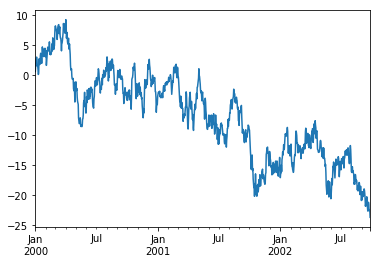

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()


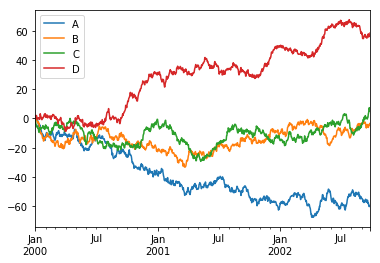

In [125]:
#在DataFrame上， plot() 是一个函数可以方便地对数据的每个列进行绘图
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
df=df.cumsum()
df.plot()


### 数据获取与导出

In [126]:
df1.to_csv('foo.csv')

In [127]:
df=pd.read_csv('foo.csv')
print(df[:10])
df

   Unnamed: 0         A         B         C  D    F    E
0  2013-01-01  0.000000  0.000000  1.160794  5  NaN  1.0
1  2013-01-02 -0.642162  1.403680 -1.497278  5  1.0  1.0
2  2013-01-03 -1.970682 -0.242796 -0.738724  5  2.0  NaN
3  2013-01-04 -1.785571 -1.994271 -1.217884  5  3.0  NaN


,Unnamed: 0,A,B,C,D,F,E
0,2013-01-01,0.000000,0.000000,1.160794,5,NaN,1.0
1,2013-01-02,-0.642162,1.403680,-1.497278,5,1.0,1.0
2,2013-01-03,-1.970682,-0.242796,-0.738724,5,2.0,NaN
3,2013-01-04,-1.785571,-1.994271,-1.217884,5,3.0,NaN


### Excel
* 生成Excel文件（需要安装openpyxl库 pip3 install openpyxl ）

In [ ]:
#df.to_excel('foo.xlsx',sheet_name='Sheet01')

In [ ]:
#print(pd.read_excel('foo.xlsx', 'Sheet01', index_col=None, na_values=['NA'])[:10])